<a href="https://colab.research.google.com/github/AshaMariam/Loan-Prediction/blob/main/Asha_Mariam_Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Virtual Competition Coding Test**

Predict Loan Eligibility for Dream Housing Finance company

In [120]:
# importing library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
# load the dataset
train = pd.read_csv('/content/train_ctrUa4K.csv')
test = pd.read_csv('/content/test_lAUu6dG.csv')


In [123]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Visualisation**

<Axes: >

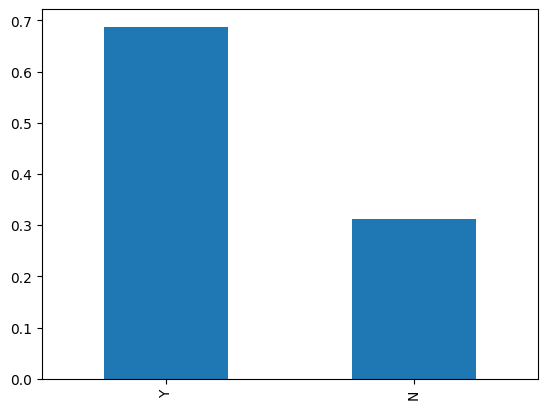

In [124]:
train['Loan_Status'].value_counts(normalize=True).plot.bar()

<Axes: >

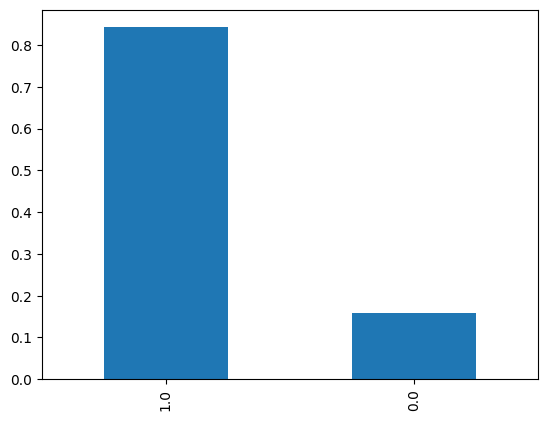

In [125]:
train['Credit_History'].value_counts(normalize=True).plot.bar()

<ipython-input-126-d0c9c9df5bde>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

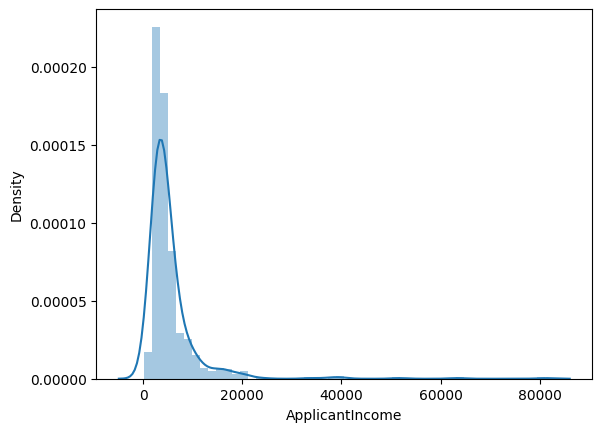

In [126]:
sns.distplot(train['ApplicantIncome'])

<Axes: >

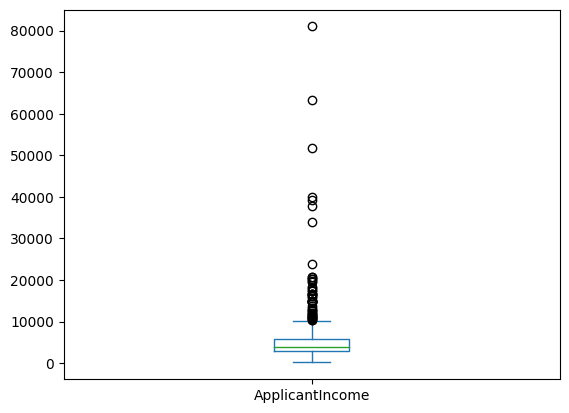

In [127]:
train['ApplicantIncome'].plot.box()

<Axes: >

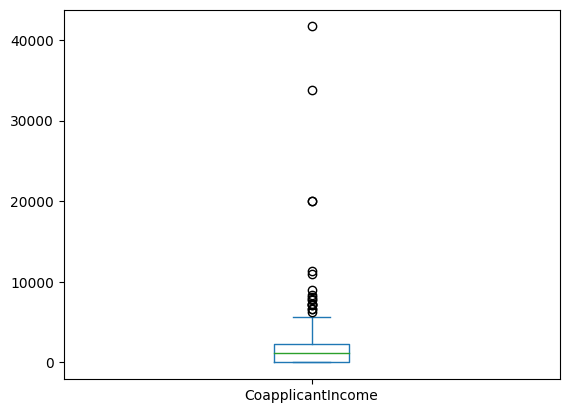

In [128]:
train['CoapplicantIncome'].plot.box()

<ipython-input-129-48acbe98d547>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

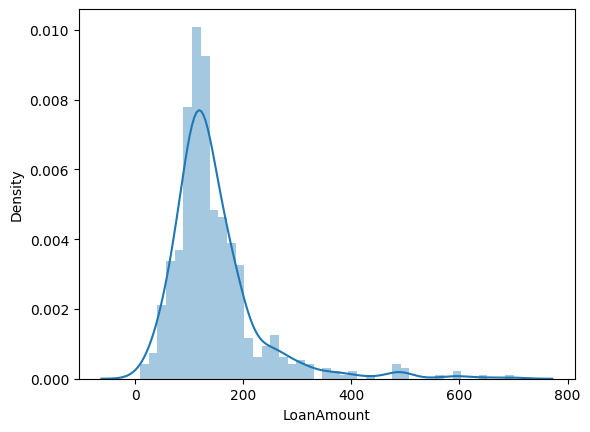

In [129]:
sns.distplot(train['LoanAmount'])

<Axes: >

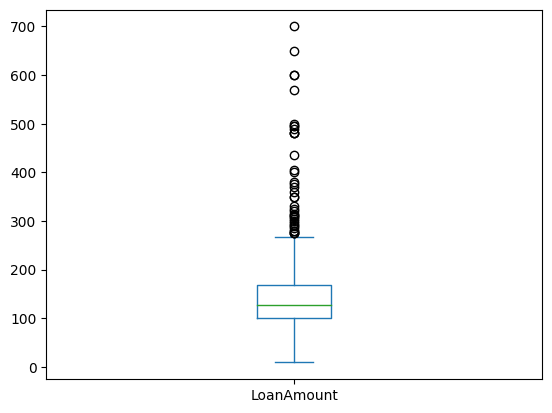

In [130]:
train['LoanAmount'].plot.box()

<ipython-input-131-17244248c507>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender',y='Loan_Status',data=train,ci=None)


<Axes: xlabel='Gender', ylabel='Loan_Status'>

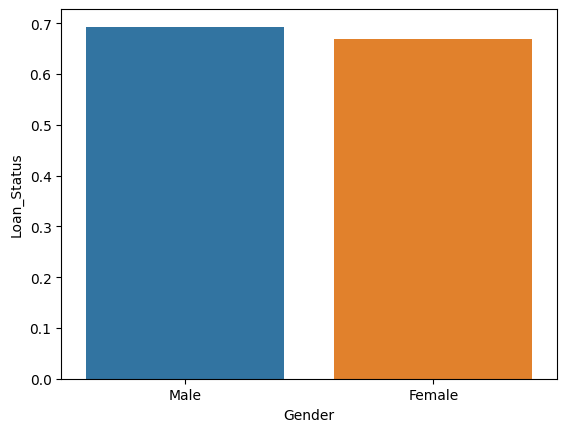

In [131]:
train['Loan_Status'] = train['Loan_Status'].map({ 'N' : 0, 'Y' : 1})
sns.barplot(x='Gender',y='Loan_Status',data=train,ci=None)

<ipython-input-132-693b9f4b9c3c>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Married',y='Loan_Status',data=train,ci=None)


<Axes: xlabel='Married', ylabel='Loan_Status'>

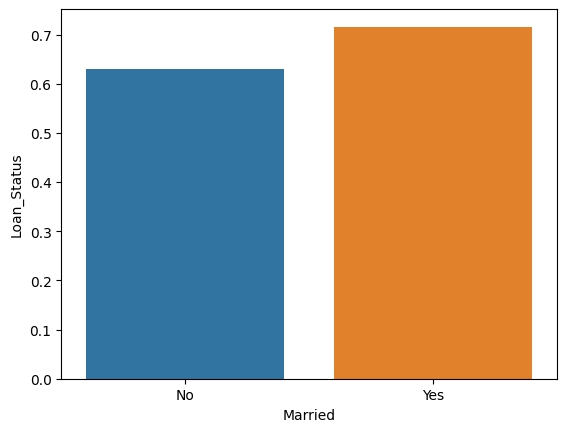

In [132]:
sns.barplot(x='Married',y='Loan_Status',data=train,ci=None)

<ipython-input-133-f46b40e615a1>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Dependents',y='Loan_Status',data=train,ci=None)


<Axes: xlabel='Dependents', ylabel='Loan_Status'>

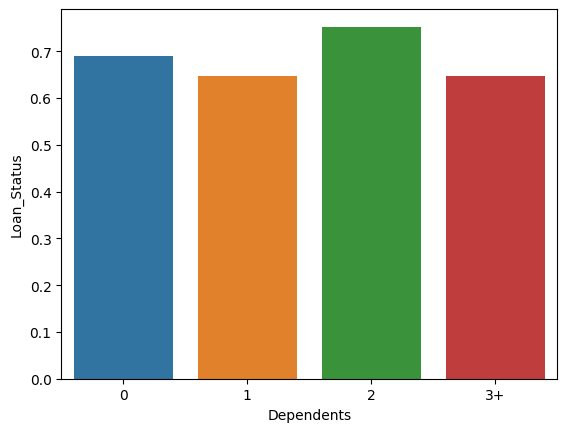

In [133]:
sns.barplot(x='Dependents',y='Loan_Status',data=train,ci=None)

<ipython-input-134-b522ed054590>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Education',y='Loan_Status',data=train,ci=None)


<Axes: xlabel='Education', ylabel='Loan_Status'>

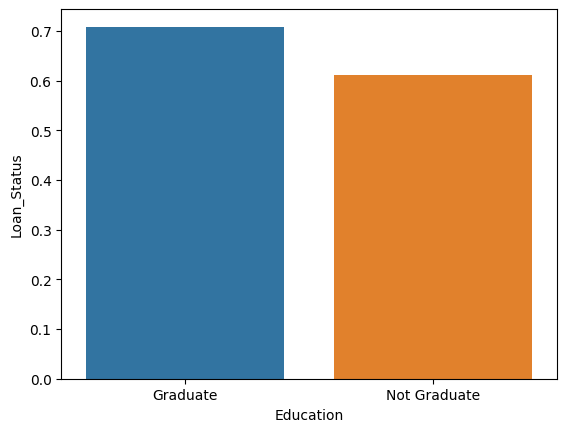

In [134]:
sns.barplot(x='Education',y='Loan_Status',data=train,ci=None)

<ipython-input-135-7ade5985f104>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Self_Employed',y='Loan_Status',data=train,ci=None)


<Axes: xlabel='Self_Employed', ylabel='Loan_Status'>

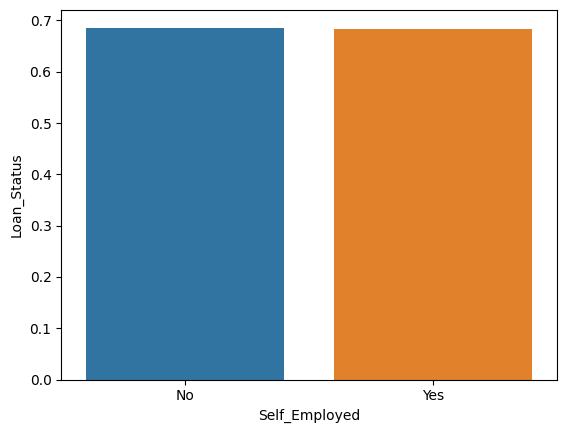

In [135]:
sns.barplot(x='Self_Employed',y='Loan_Status',data=train,ci=None)

<ipython-input-136-ca9b088694fa>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Property_Area',y='Loan_Status',data=train,ci=None)


<Axes: xlabel='Property_Area', ylabel='Loan_Status'>

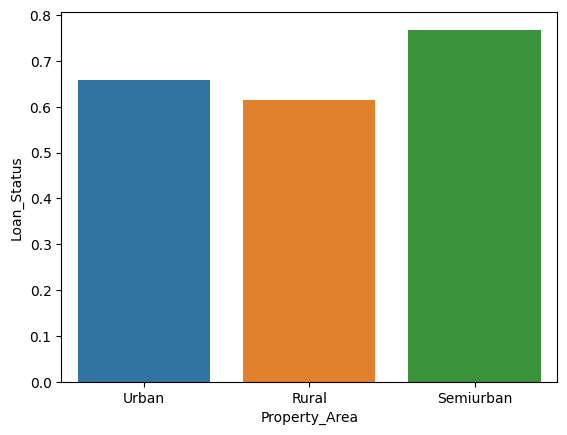

In [136]:
sns.barplot(x='Property_Area',y='Loan_Status',data=train,ci=None)

CoapplicantIncome   -0.059187
LoanAmount          -0.037318
Loan_Amount_Term    -0.021268
ApplicantIncome     -0.004710
Credit_History       0.561678
Loan_Status          1.000000
Name: Loan_Status, dtype: float64


<ipython-input-137-c7c71c270450>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=train.corr()


<Axes: >

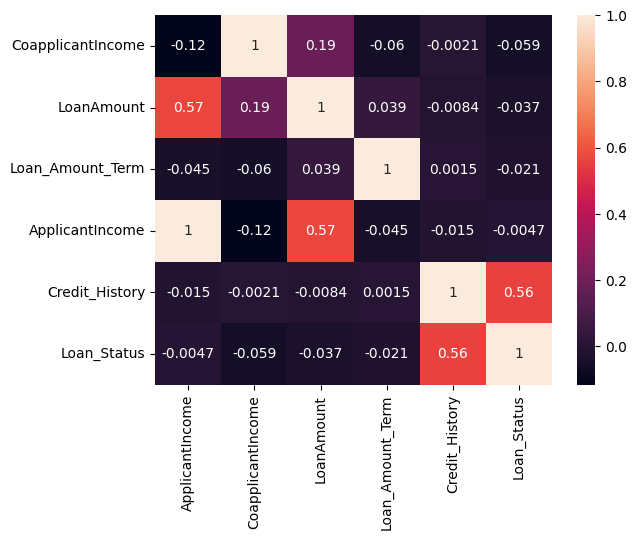

In [137]:
# Correlation Matrix
corr=train.corr()
corr.sort_values('Loan_Status',ascending=True,inplace=True)
print(corr['Loan_Status'])
sns.heatmap(corr,annot=True)

In [138]:
# fill the null values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [139]:
train['Married'].fillna(train['Married'].value_counts().index[0], inplace=True)
test['Married'].fillna(test['Married'].value_counts().index[0], inplace=True)


In [140]:
train.loc[(train.Dependents.isnull())&(train.Loan_Status==1),'Dependents'] = '2'
train.loc[(train.Dependents.isnull()),'Dependents'] = '1'

test.loc[(test.Dependents.isnull())&(test.Credit_History==1),'Dependents'] = '2'
test.loc[(test.Dependents.isnull()),'Dependents'] = '1'

In [141]:
train.loc[(train.Credit_History.isnull())&(train.Loan_Status==1),'Credit_History'] = 1
train.loc[(train.Credit_History.isnull()),'Credit_History'] = 0

test['Credit_History'].fillna(test['Credit_History'].value_counts().index[0], inplace=True)

test.loc[(test.ApplicantIncome == 2733),'Credit_History']  = 0

In [142]:
# Fill Null values with mode of Gender column
train['Gender'].fillna(train['Gender'].value_counts().index[0], inplace=True)

test['Gender'].fillna(test['Gender'].value_counts().index[0], inplace=True)

In [143]:
train.loc[(train.Self_Employed.isnull())&(train.Credit_History==1),'Self_Employed'] ='No'
train.loc[(train.Self_Employed.isnull()),'Self_Employed'] = 'Yes'

test.loc[(test.Self_Employed.isnull())&(test.Credit_History==1),'Self_Employed'] ='No'
test.loc[(test.Self_Employed.isnull()),'Self_Employed'] = 'Yes'

In [144]:
index_NaN_Loan_Amount_Term = list(train["Loan_Amount_Term"][train["Loan_Amount_Term"].isnull()].index)

for i in index_NaN_Loan_Amount_Term :
    Loan_Amount_Term_med = train["Loan_Amount_Term"].median()
    Loan_Amount_Term_pred = train["Loan_Amount_Term"][((train['Gender'] == train.iloc[i]["Gender"]) & (train['Married'] == train.iloc[i]["Married"]) & (train['Education'] == train.iloc[i]["Education"]) & (train['Self_Employed'] == train.iloc[i]["Self_Employed"]) & (train['Dependents'] == train.iloc[i]["Dependents"]))].median()
    if not np.isnan(Loan_Amount_Term_pred) :
        train['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_pred
    else :
        train['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_med


<ipython-input-144-edbf82d2beba>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_pred
<ipython-input-144-edbf82d2beba>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_pred
<ipython-input-144-edbf82d2beba>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_pred
<ipython-input-144-

In [145]:
index_NaN_Loan_Amount_Term_test = list(test["Loan_Amount_Term"][test["Loan_Amount_Term"].isnull()].index)

for i in index_NaN_Loan_Amount_Term_test :
    Loan_Amount_Term_med = test["Loan_Amount_Term"].median()
    Loan_Amount_Term_pred = test["Loan_Amount_Term"][(( test['Gender'] == test.iloc[i]["Gender"]) & (test['Married'] == test.iloc[i]["Married"]) & (test['Education'] == test.iloc[i]["Education"]) & (test['Self_Employed'] == test.iloc[i]["Self_Employed"]) & (test['Dependents'] == test.iloc[i]["Dependents"]))].median()
    if not np.isnan(Loan_Amount_Term_pred) :
        test['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_pred
    else :
        test['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_med

<ipython-input-145-00a85a9b8ee1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_pred
<ipython-input-145-00a85a9b8ee1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_pred
<ipython-input-145-00a85a9b8ee1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_pred
<ipython-input-145-00a

In [146]:
index_NaN_LoanAmount = list(train["LoanAmount"][train["LoanAmount"].isnull()].index)

for i in index_NaN_LoanAmount :
    LoanAmount_med = train["LoanAmount"].median()
    LoanAmount_pred = train["LoanAmount"][((train['Property_Area'] == train.iloc[i]["Property_Area"]) & (train['Gender'] == train.iloc[i]["Gender"]) & (train['Married'] == train.iloc[i]["Married"]) & (train['Education'] == train.iloc[i]["Education"]) & (train['Self_Employed'] == train.iloc[i]["Self_Employed"]) & (train['Dependents'] == train.iloc[i]["Dependents"]))].median()
    if not np.isnan(LoanAmount_pred) :
        train['LoanAmount'].iloc[i] = LoanAmount_pred
    else :
        train['LoanAmount'].iloc[i] = LoanAmount_med


<ipython-input-146-145a076c37ae>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['LoanAmount'].iloc[i] = LoanAmount_pred
<ipython-input-146-145a076c37ae>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['LoanAmount'].iloc[i] = LoanAmount_pred
<ipython-input-146-145a076c37ae>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['LoanAmount'].iloc[i] = LoanAmount_pred
<ipython-input-146-145a076c37ae>:8: SettingWithCopyWarn

In [147]:
#Impute Loan amount for test
index_NaN_LoanAmount_test = list(test["LoanAmount"][test["LoanAmount"].isnull()].index)

for i in index_NaN_LoanAmount_test :
    LoanAmount_med = test["LoanAmount"].median()
    LoanAmount_pred = test["LoanAmount"][((test['Property_Area'] == test.iloc[i]["Property_Area"]) & (test['Gender'] == test.iloc[i]["Gender"]) & (test['Married'] == test.iloc[i]["Married"]) & (test['Education'] == test.iloc[i]["Education"]) & (test['Self_Employed'] == test.iloc[i]["Self_Employed"]) & (test['Dependents'] == test.iloc[i]["Dependents"]))].median()
    if not np.isnan(LoanAmount_pred) :
        test['LoanAmount'].iloc[i] = LoanAmount_pred
    else :
        test['LoanAmount'].iloc[i] = LoanAmount_med

<ipython-input-147-487e846e9eaa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LoanAmount'].iloc[i] = LoanAmount_pred
<ipython-input-147-487e846e9eaa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LoanAmount'].iloc[i] = LoanAmount_pred
<ipython-input-147-487e846e9eaa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LoanAmount'].iloc[i] = LoanAmount_pred
<ipython-input-147-487e846e9eaa>:8: SettingWithCopyWarning

In [148]:
train.isnull().sum()
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [149]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [150]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,105.0,360.0,1.0,Urban,1,4.653960
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760


In [151]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

In [152]:
train['Total_Income_log'] = np.log(train['Total_Income'])
test['Total_Income_log'] = np.log(test['Total_Income'])

In [153]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,105.0,360.0,1.0,Urban,1,4.653960,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760,6000.0,8.699515


In [154]:
del train['Loan_ID']
del test['Loan_ID']

In [155]:
cat_col = ['Gender', 'Married', 'Self_Employed', 'Education']
for column in cat_col:
    train1 = pd.get_dummies(train, columns = cat_col)
    test1 = pd.get_dummies(test, columns = cat_col)

In [156]:
train1["Dependents"] = train1["Dependents"].map({"0": 0, "1": 1,"2": 2, "3+": 3})

train1["Property_Area"] = train1["Property_Area"].map({"Rural":0, "Semiurban":1, "Urban": 2,})

test1["Dependents"] = test1["Dependents"].map({"0": 0, "1": 1,"2": 2, "3+": 3})

test1["Property_Area"] = test1["Property_Area"].map({"Rural":0, "Semiurban":1, "Urban": 2,})

In [157]:
train1.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Education_Graduate,Education_Not Graduate
0,0,5849,0.0,105.0,360.0,1.0,2,1,4.653960,5849.0,8.674026,0,1,1,0,1,0,1,0
1,1,4583,1508.0,128.0,360.0,1.0,0,0,4.852030,6091.0,8.714568,0,1,0,1,1,0,1,0
2,0,3000,0.0,66.0,360.0,1.0,2,1,4.189655,3000.0,8.006368,0,1,0,1,0,1,1,0
3,0,2583,2358.0,120.0,360.0,1.0,2,1,4.787492,4941.0,8.505323,0,1,0,1,1,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,2,1,4.948760,6000.0,8.699515,0,1,1,0,1,0,1,0


In [158]:
del train1['ApplicantIncome']
del train1['CoapplicantIncome']
del train1['LoanAmount']

del test1['ApplicantIncome']
del test1['CoapplicantIncome']
del test1['LoanAmount']

In [159]:
train1.head()

,Dependents,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Education_Graduate,Education_Not Graduate
0,0,360.0,1.0,2,1,4.653960,5849.0,8.674026,0,1,1,0,1,0,1,0
1,1,360.0,1.0,0,0,4.852030,6091.0,8.714568,0,1,0,1,1,0,1,0
2,0,360.0,1.0,2,1,4.189655,3000.0,8.006368,0,1,0,1,0,1,1,0
3,0,360.0,1.0,2,1,4.787492,4941.0,8.505323,0,1,0,1,1,0,0,1
4,0,360.0,1.0,2,1,4.948760,6000.0,8.699515,0,1,1,0,1,0,1,0


In [160]:
del train1['Total_Income']
del test1['Total_Income']

In [161]:
train1["Loan_Status"] = train1["Loan_Status"].map({"N": 0, "Y": 1})

In [162]:
train1.columns

Index(['Dependents', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'LoanAmount_log', 'Total_Income_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Self_Employed_No',
       'Self_Employed_Yes', 'Education_Graduate', 'Education_Not Graduate'],
      dtype='object')

In [166]:
y = train1['Loan_Status']

In [171]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train1.drop('Loan_Status', axis = 1), y, test_size=0.20, random_state=7, shuffle=True)


In [179]:
# Finding best hyperparameters using Grid Search method for Random Forest to function

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 1)

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,
              min_samples_split = min_samples_split,
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1,
                      n_jobs = -1)
bestF = gridF.fit(x_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [180]:
rfc = RandomForestClassifier(random_state = 1, max_depth = 8, n_estimators = 1200, min_samples_split = 15, min_samples_leaf = 2)

modelr = rfc.fit(x_train, y_train)

y_pred = modelr.predict(x_test)

In [184]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [185]:
# Finding best hyperparameters for XGBoost to run using GridSearch method

import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

parameters = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'max_depth': [8, 10, 12, 15],
    'gamma': [0.001, 0.005, 0.01, 0.02],
    'random_state': [42]
}

eval_set = [(x_test, y_test)]
model = xgb.XGBClassifier(eval_set=eval_set, objective='reg:squarederror', verbose=False)
clf = GridSearchCV(model, parameters)

clf.fit(x_train, y_train)

print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:05:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "eval_set", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:05:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "eval_set", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:05:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "eval_set", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:05:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "eval_set", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:05:23] WARNING:

Best params: {'gamma': 0.001, 'learning_rate': 0.001, 'max_depth': 8, 'n_estimators': 100, 'random_state': 42}
Best validation score = 1.0


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:07:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "eval_set", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:07:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "eval_set", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


In [186]:
# Fitting and Predicting model

modelxg = xgb.XGBClassifier(gamma = 0.001, learning_rate = 0.001, max_depth = 8, n_estimators = 200, random_state = 42, objective='reg:squarederror')
modelxg.fit(x_train,y_train, eval_set=eval_set, verbose=False)
y_xg = modelxg.predict(x_test)
accuracy_score(y_test, y_xg)

1.0

In [187]:
A_pred = modelr.predict(test1)

In [188]:
A_pred1 = modelxg.predict(test1)

In [190]:
from pandas import DataFrame

df = DataFrame (A_pred,columns=['Loan_Status'])

In [191]:
from pandas import DataFrame

df1 = DataFrame (A_pred1,columns=['Loan_Status'])

In [192]:
df['Loan_Status'] = df['Loan_Status'].map({ 0 : 'N', 1 : 'Y'})

In [193]:
df1['Loan_Status'] = df1['Loan_Status'].map({ 0 : 'N', 1 : 'Y'})

In [194]:
df.to_csv('Pred2.csv',index=False,header=True)

In [195]:
df1.to_csv('Pred3.csv',index=False,header=True)